<a href="https://colab.research.google.com/github/jscienciadados/instance-based/blob/main/Aprendizado_Baseado_Em_Instancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Aprendizado Baseado em Instância - Knn

# Base de Dados - Credit Data

In [2]:
import pickle
with open('credit.pkl', 'rb') as f:
  X_crdit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [3]:
print(X_crdit_treinamento.shape)
print(X_credit_teste.shape)
print(y_credit_treinamento.shape)
print(y_credit_teste.shape)

(1500, 3)
(500, 3)
(1500,)
(500,)


# Gerando o modelo - Knn

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_crdit_treinamento, y_credit_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Gerando as Previsões

In [8]:
previsoes = knn_credit.predict(X_credit_teste)

# Avaliando a Performance do Modelo

In [10]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.986

# Gerando a Matriz de Confusão

0.986

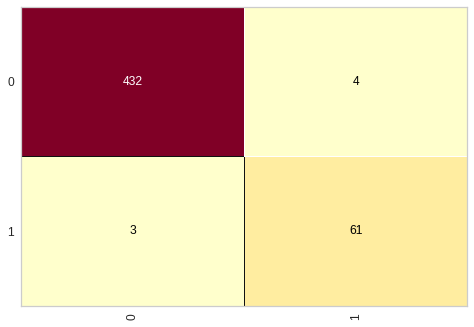

In [14]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_crdit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

# Relatório

In [15]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



# Trabalhando com a Base de Dados Census

Carregando os dados

In [18]:
import pickle
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [19]:
print(X_census_treinamento.shape)
print(X_census_teste.shape)
print(y_census_treinamento.shape)
print(y_census_teste.shape)

(27676, 108)
(4885, 108)
(27676,)
(4885,)


# Modelo

In [35]:
knn_census = KNeighborsClassifier(n_neighbors=11)
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

# Previsoes

In [36]:
previsoes = knn_census.predict(X_census_teste)

In [23]:
previsoes

array([' <=50K', ' <=50K', ' >50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [24]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##Accuracy

In [37]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

0.8278403275332651

# Matriz de Confusão

0.8278403275332651

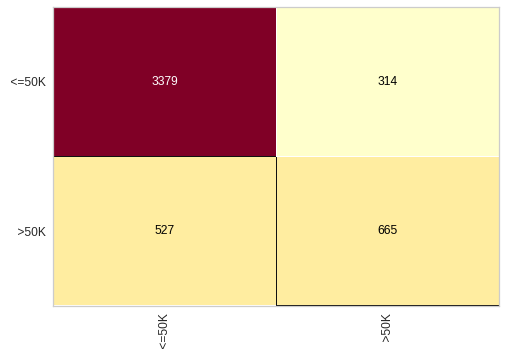

In [40]:
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

# Relatório

In [41]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      3693
        >50K       0.68      0.56      0.61      1192

    accuracy                           0.83      4885
   macro avg       0.77      0.74      0.75      4885
weighted avg       0.82      0.83      0.82      4885

